<IPython.core.display.Javascript object>


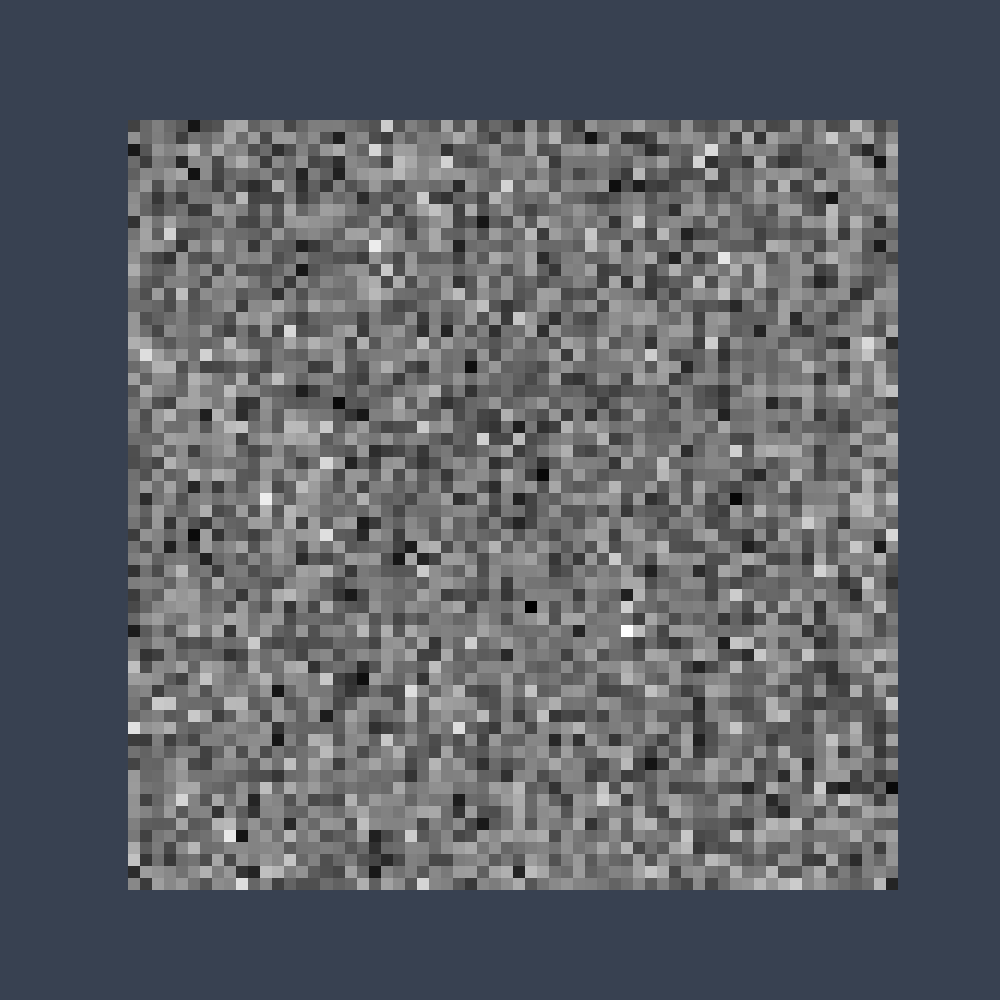

<IPython.core.display.Javascript object>


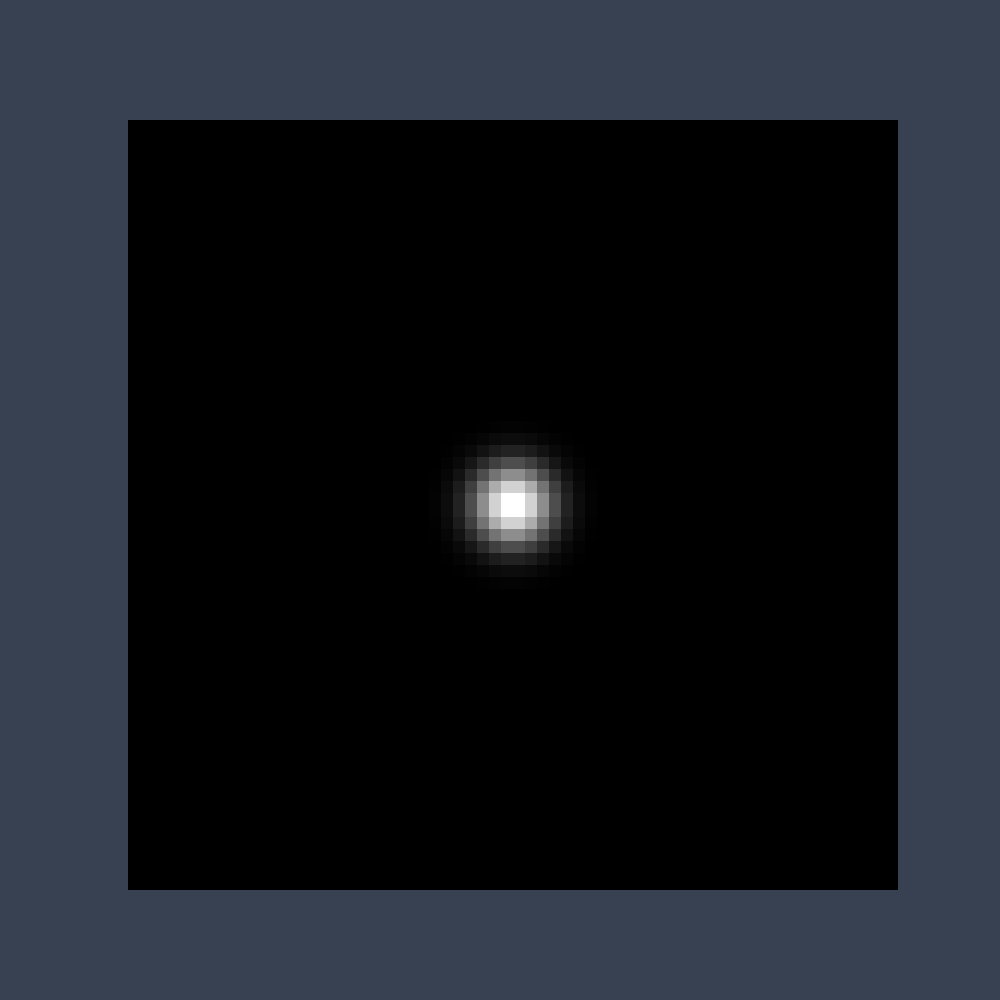

<IPython.core.display.Javascript object>


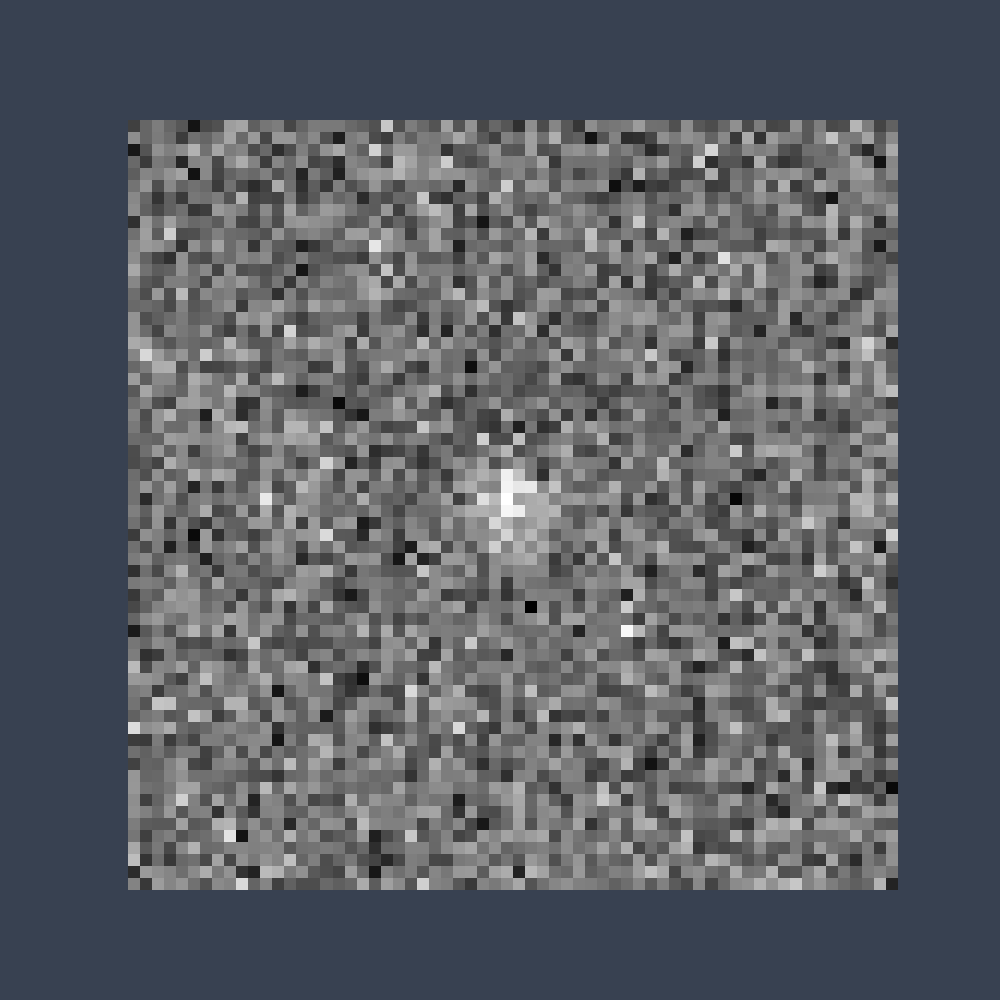

In [1]:
%matplotlib notebook

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

# Set plot theme
jtplot.style()

# Settings
mean_noise = 100 # set mean noise
signal_intensity = 100 # set signal intensity
gaussian_sigma = 2 # set sd of gaussian kernel
num_images = 200 # number of images to create

# Create list to store noise images
noise = []

# Create noise images
for n in range(num_images):
    # Create measurement noise
    noise.append(np.random.normal(mean_noise,mean_noise**(0.5),(64,64))/255)

# Create signal image
signal = np.zeros((64,64))
signal[30:34,31:33] = signal_intensity
signal[31:33,30:34] = signal_intensity

# Apply Gaussian kernel to signal image
signal = snd.filters.gaussian_filter(signal,gaussian_sigma)/255

# Combine signal + noise
noise_signal = [signal+nse for nse in noise]

# Display Images (from 1st sample)

# noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(noise[0],cmap='gray')

# signal image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal,cmap='gray')
plt.show()

# signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(noise_signal[0],cmap='gray')

# plot images
plt.show()

<IPython.core.display.Javascript object>


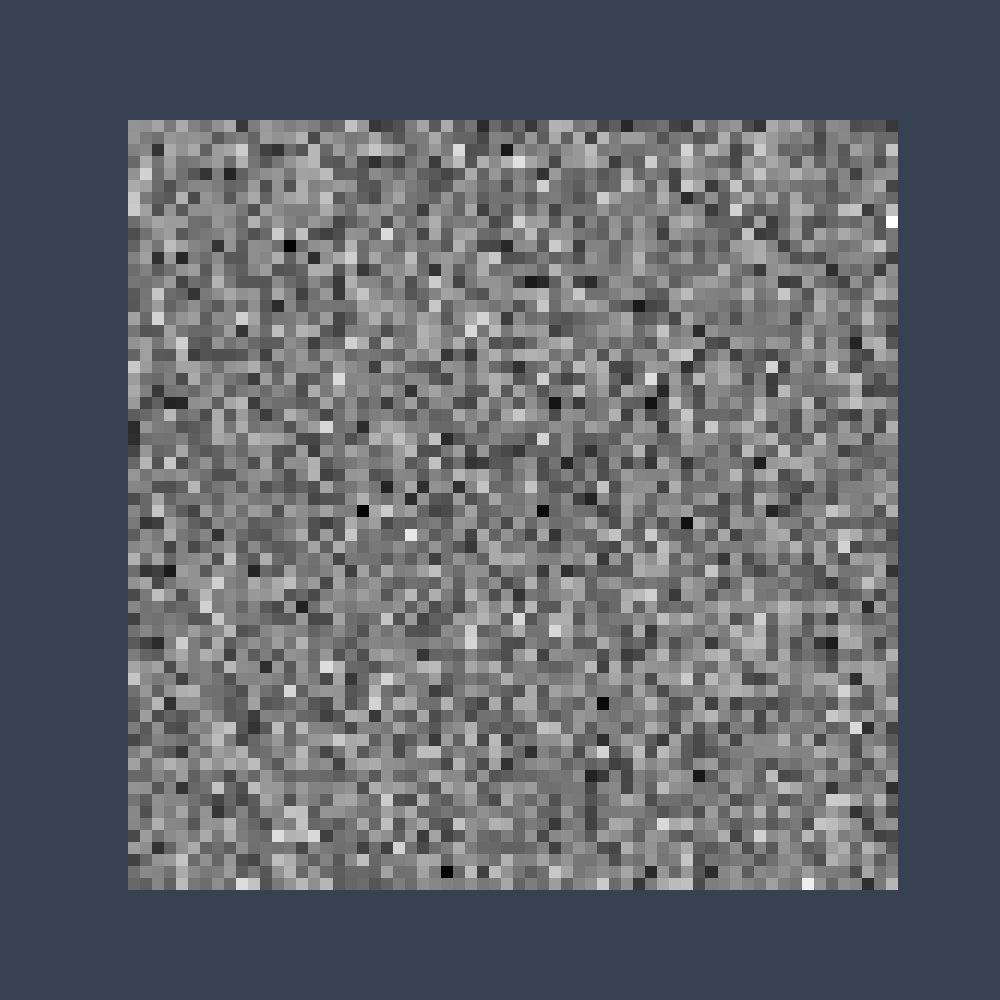

<IPython.core.display.Javascript object>


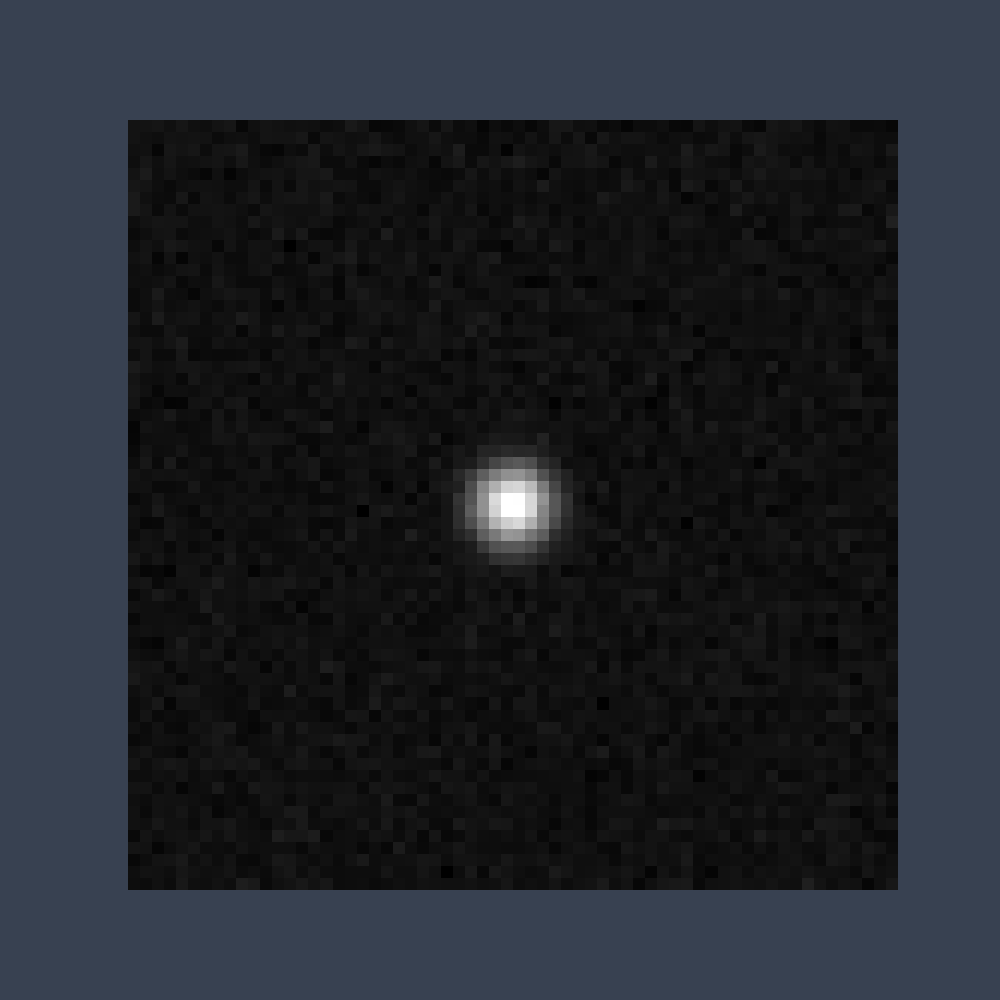

In [2]:
from functools import reduce

# Generate average images for signal+noise and noise
avg_noise = reduce(lambda x,y:x+y, noise)/num_images
avg_noise_signal = reduce(lambda x,y:x+y, noise_signal)/num_images

# avg noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_noise,cmap='gray')

# avg signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_noise_signal,cmap='gray')

# plot images
plt.show()

# flatten
avg_noise_array = avg_noise.flatten()
avg_noise_signal_array = avg_noise_signal.flatten()

In [3]:
# prepare arrays to calculate to covariance
noise_array = np.transpose(np.vstack([n.flatten() for n in noise]))
noise_signal_array = np.transpose(np.vstack([n.flatten() for n in noise_signal]))
data_array = np.hstack((noise_array,noise_signal_array))

# calculate covariance
covariance = np.cov(noise_array)

# calculate diffence of avg 2 classes
avg_t = np.transpose(avg_noise_signal_array-avg_noise_array)

# calculate test statistic
l_pw = np.matmul(np.matmul(avg_t,np.linalg.inv(covariance)),data_array)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.015 0.025 0.05  0.07  0.09  0.1   0.115 0.145 0.155
 0.17  0.19  0.205 0.22  0.235 0.255 0.26  0.27  0.275 0.29  0.335 0.375
 0.385 0.405 0.415 0.425 0.44  0.455 0.485 0.495 0.525 0.54  0.555 0.56
 0.6   0.61  0.63  0.665 0.685 0.69  0.7   0.705 0.725 0.74  0.75  0.76
 0.77  0.785 0.795 0.805 0.815 0.835 0.845 0.86  0.865 0.88  0.9   0.91
 0.92  0.935 0.945 0.965 0.975 1.   ]
[0.005 0.015 0.025 0.095 0.115 0.145 0.155 0.16  0.19  0.195 0.21  0.215
 0.235 0.245 0.26  0.27  0.3   0.315 0.335 0.375 0.39  0.395 0.415 0.435
 0.455 0.46  0.475 0.5   0.51  0.52  0.54  0.55  0.555 0.565 0.595 0.615
 0.63  0.65  0.67  0.675 0.69  

<IPython.core.display.Javascript object>


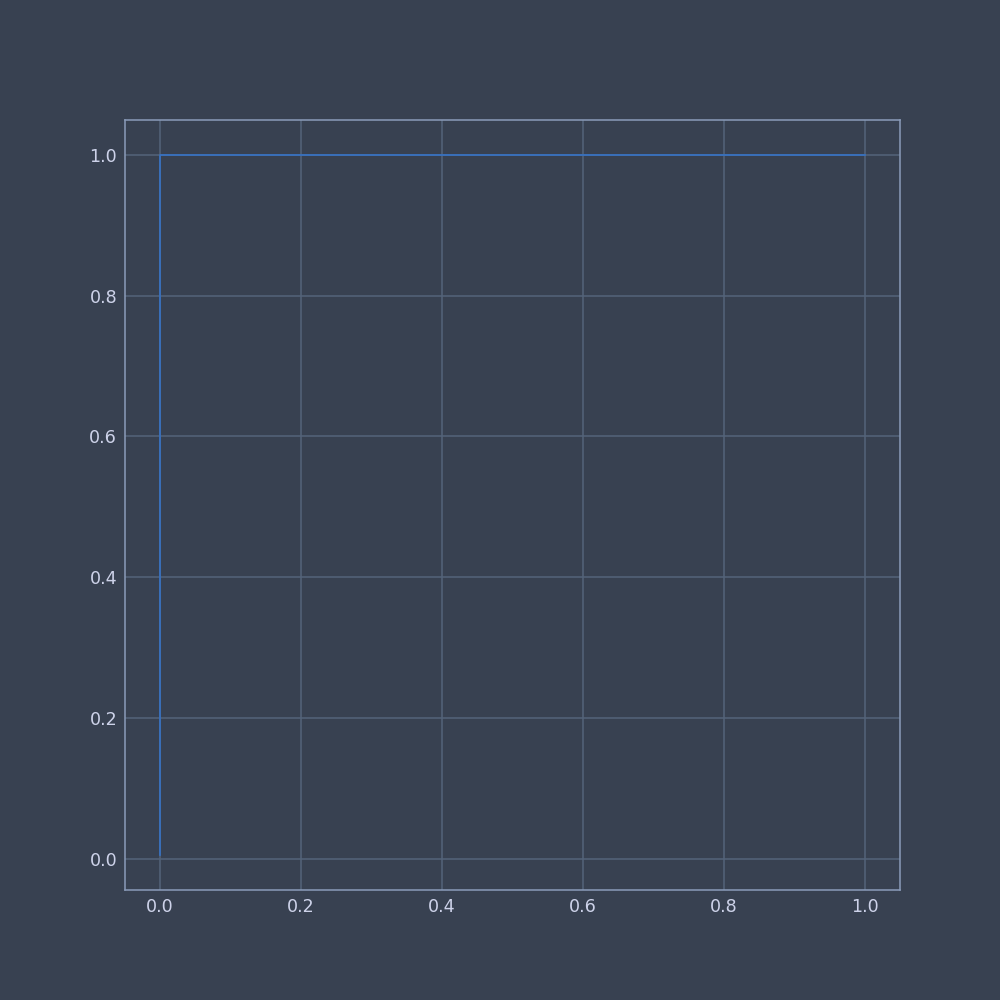

In [4]:
from sklearn.metrics import roc_auc_score,roc_curve

# print performance
img_cls = np.array([0]*200 + [1]*200)
[fpr,tpr,threshold] = roc_curve(img_cls,l_pw)
print(fpr)
print(tpr)
print("AUC: {}".format(roc_auc_score(img_cls,l_pw)))
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.show()